# Multi Feature Clustering

## Initialization

In [1]:
# Display plots inline
%matplotlib inline

# Autoreload all package before excecuting a call
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np

import tailor
from tailor.clustering import *
from tailor.visualization import *

In [3]:
data = tailor.load_data()

In [4]:
data.sample(10)

,article_id,season,brand,color,Abteilung,WHG,WUG,month,time_on_sale,original_price,sells_price,discount,markdown,article_count,stock_total,avq,revenue
67182,902320,Winter,Gna,schwarz,Abteilung006,WHG034,WUG115,Apr,8,49.95,55.360,-5.410000,0.000000,2.000000,1290.0,9.896641,103.226667
175561,906012,Spring,Mercurius Cimbrianus,mittelbraun,Abteilung005,WHG023,WUG081,May,3,54.95,54.950,0.000000,0.000000,1.500000,2370.0,2.805907,82.425000
80385,902765,Winter,Alaisiagae,schwarz,Abteilung006,WHG034,WUG115,Mar,12,49.95,48.320,1.630000,0.000000,1.666667,455.0,23.772894,80.733333
24654,900859,Fall,Odin,dunkelgrau,Abteilung002,WHG010,WUG033,Dec,12,59.95,47.570,10.665714,1.714286,10.714286,3181.0,34.813850,508.022857
234681,908047,Winter,Baudihillia,gelb,Abteilung003,WHG017,WUG058,Jan,2,19.95,14.116,5.834000,0.000000,5.800000,1856.0,2.090517,63.820000
144664,904974,Summer,Friagabis,schwarz,Abteilung002,WHG015,WUG051,Dec,15,79.95,41.560,18.390000,20.000000,2.400000,239.0,40.418410,98.704000
87154,902991,Winter,Yngvi,schwarz / kombiniert,Abteilung004,WHG027,WUG097,May,17,12.95,12.808,0.142000,0.000000,16.800000,2668.0,47.683658,214.586000
181836,906226,Spring,Odin,weiss / blau,Abteilung001,WHG001,WUG001,Jun,7,15.95,15.770,0.180000,0.000000,36.833333,4257.0,39.061154,580.623333
178147,906100,Spring,Skuld,weiss,Abteilung002,WHG007,WUG021,Apr,2,89.95,89.950,0.000000,0.000000,1.000000,290.0,1.379310,89.950000
38535,901338,Winter,Fimmilena,beige,Abteilung002,WHG007,WUG020,Apr,8,59.95,54.950,5.000000,0.000000,1.000000,615.0,4.552846,54.950000


## Feature Selection

### Ranking by Euclidean

In [5]:
feats = ['color', 'brand', 'Abteilung', 'WHG', 'WUG', 'season']
ranking.rank_features(data, distance.euclidean , feats, 'article_count')

Abteilung    1.098196
brand        0.256130
WHG          0.250199
season       0.199529
WUG          0.132761
color        0.059410
dtype: float64

### Ranking by Derivative Euclidean

In [6]:
ranking.rank_features(data, distance.derivative_euclidean , feats, 'article_count')

Abteilung    0.065394
WUG          0.028632
WHG          0.018548
brand        0.017651
season       0.011989
color        0.008734
dtype: float64

While both distance measures find 'Abteilung' the most informative first clustering feature by a large margin and 'color' the least informative, the order of the other features is quite different.

In [7]:
dfs_abteilung = pd.Series()

uniques = data.Abteilung.unique()

feats = ['color', 'brand', 'WHG', 'WUG', 'season']

for abteilung in uniques:
    dfs_abteilung[abteilung] = data[data.Abteilung == abteilung].drop(columns='Abteilung')
    print(abteilung + ":")
    print(ranking.rank_features(dfs_abteilung[abteilung], distance.derivative_euclidean , feats, 'article_count'))
    print("")

Abteilung005:
WHG       0.132914
brand     0.061019
WUG       0.054104
color     0.033818
season    0.008786
dtype: float64

Abteilung007:
color     0.050412
brand     0.042418
season    0.037000
WUG       0.031103
WHG       0.020494
dtype: float64

Abteilung001:
WUG       1.572719
brand     0.759055
season    0.469411
color     0.334035
WHG       0.181786
dtype: float64

Abteilung002:
brand     0.080626
WUG       0.054312
WHG       0.036896
season    0.022670
color     0.021835
dtype: float64

Abteilung003:
season    1.587607
brand     1.335820
color     0.907630
WUG       0.545156
WHG       0.545156
dtype: float64

Abteilung004:
WUG       0.257799
WHG       0.232776
color     0.194531
season    0.115005
brand     0.114199
dtype: float64

Abteilung006:
WUG       0.366757
brand     0.048528
WHG       0.046328
season    0.040089
color     0.025817
dtype: float64



In [8]:
df = dfs_abteilung['Abteilung001']
df.article_id.unique()

[900004, 900005, 900006, 900007, 900008, ..., 908700, 908701, 908702, 908703, 908704]
Length: 198
Categories (198, int64): [900004, 900005, 900006, 900007, ..., 908701, 908702, 908703, 908704]

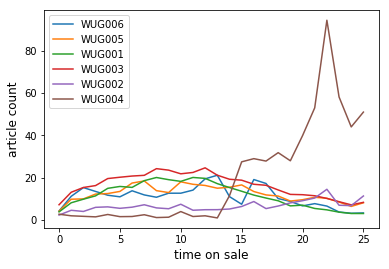

In [9]:
plot_feature_characteristics(df, 'WUG', 'article_count', legend=True);

In [10]:
df_temp = df[df.WUG == 'WUG004']
df_temp.article_id.unique()

[907532]
Categories (1, int64): [907532]

WUG has scored high in our rank_features method for 'Abteilung001', but results in an inefficient separation as 'WUG004' only contains 1 article.

In [11]:
df = dfs_abteilung['Abteilung002']
df.article_id.unique()

[900009, 900010, 900033, 900034, 900035, ..., 908692, 908693, 908694, 908695, 908696]
Length: 3872
Categories (3872, int64): [900009, 900010, 900033, 900034, ..., 908693, 908694, 908695, 908696]

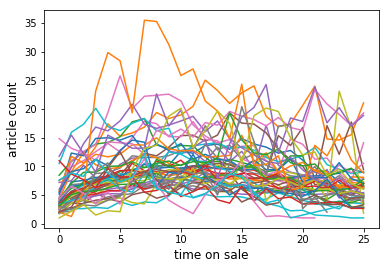

In [12]:
plot_feature_characteristics(df, 'WUG', 'article_count', legend=False);

'Abteilung002' has much more WUG uniques than 'Abteilung001' and 19 times the articles. This should be taken into consideration when determining the second clustering feature.